- Prepare rules for the all the data sets 


1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values


2) Change the minimum length in apriori algorithm


3) Visulize the obtained rules using different plots 

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
books=pd.read_csv('book.csv')

In [3]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# EDA

In [4]:
books.shape

(2000, 11)

In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
books.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

- zero null value and datatype assign accuratly

In [7]:
books.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


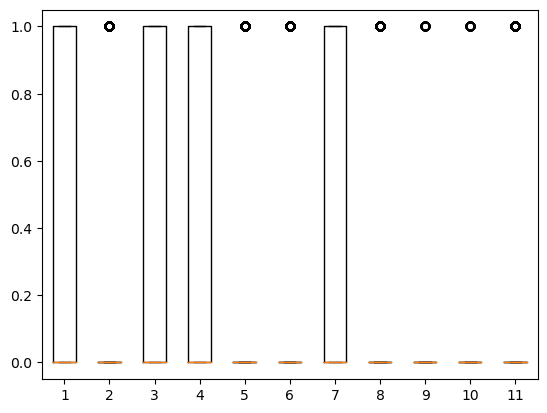

In [8]:
#outliers detection
plt.boxplot(books)
plt.show();

- since all columns are having only 2 values no need for outlier and skew treatment

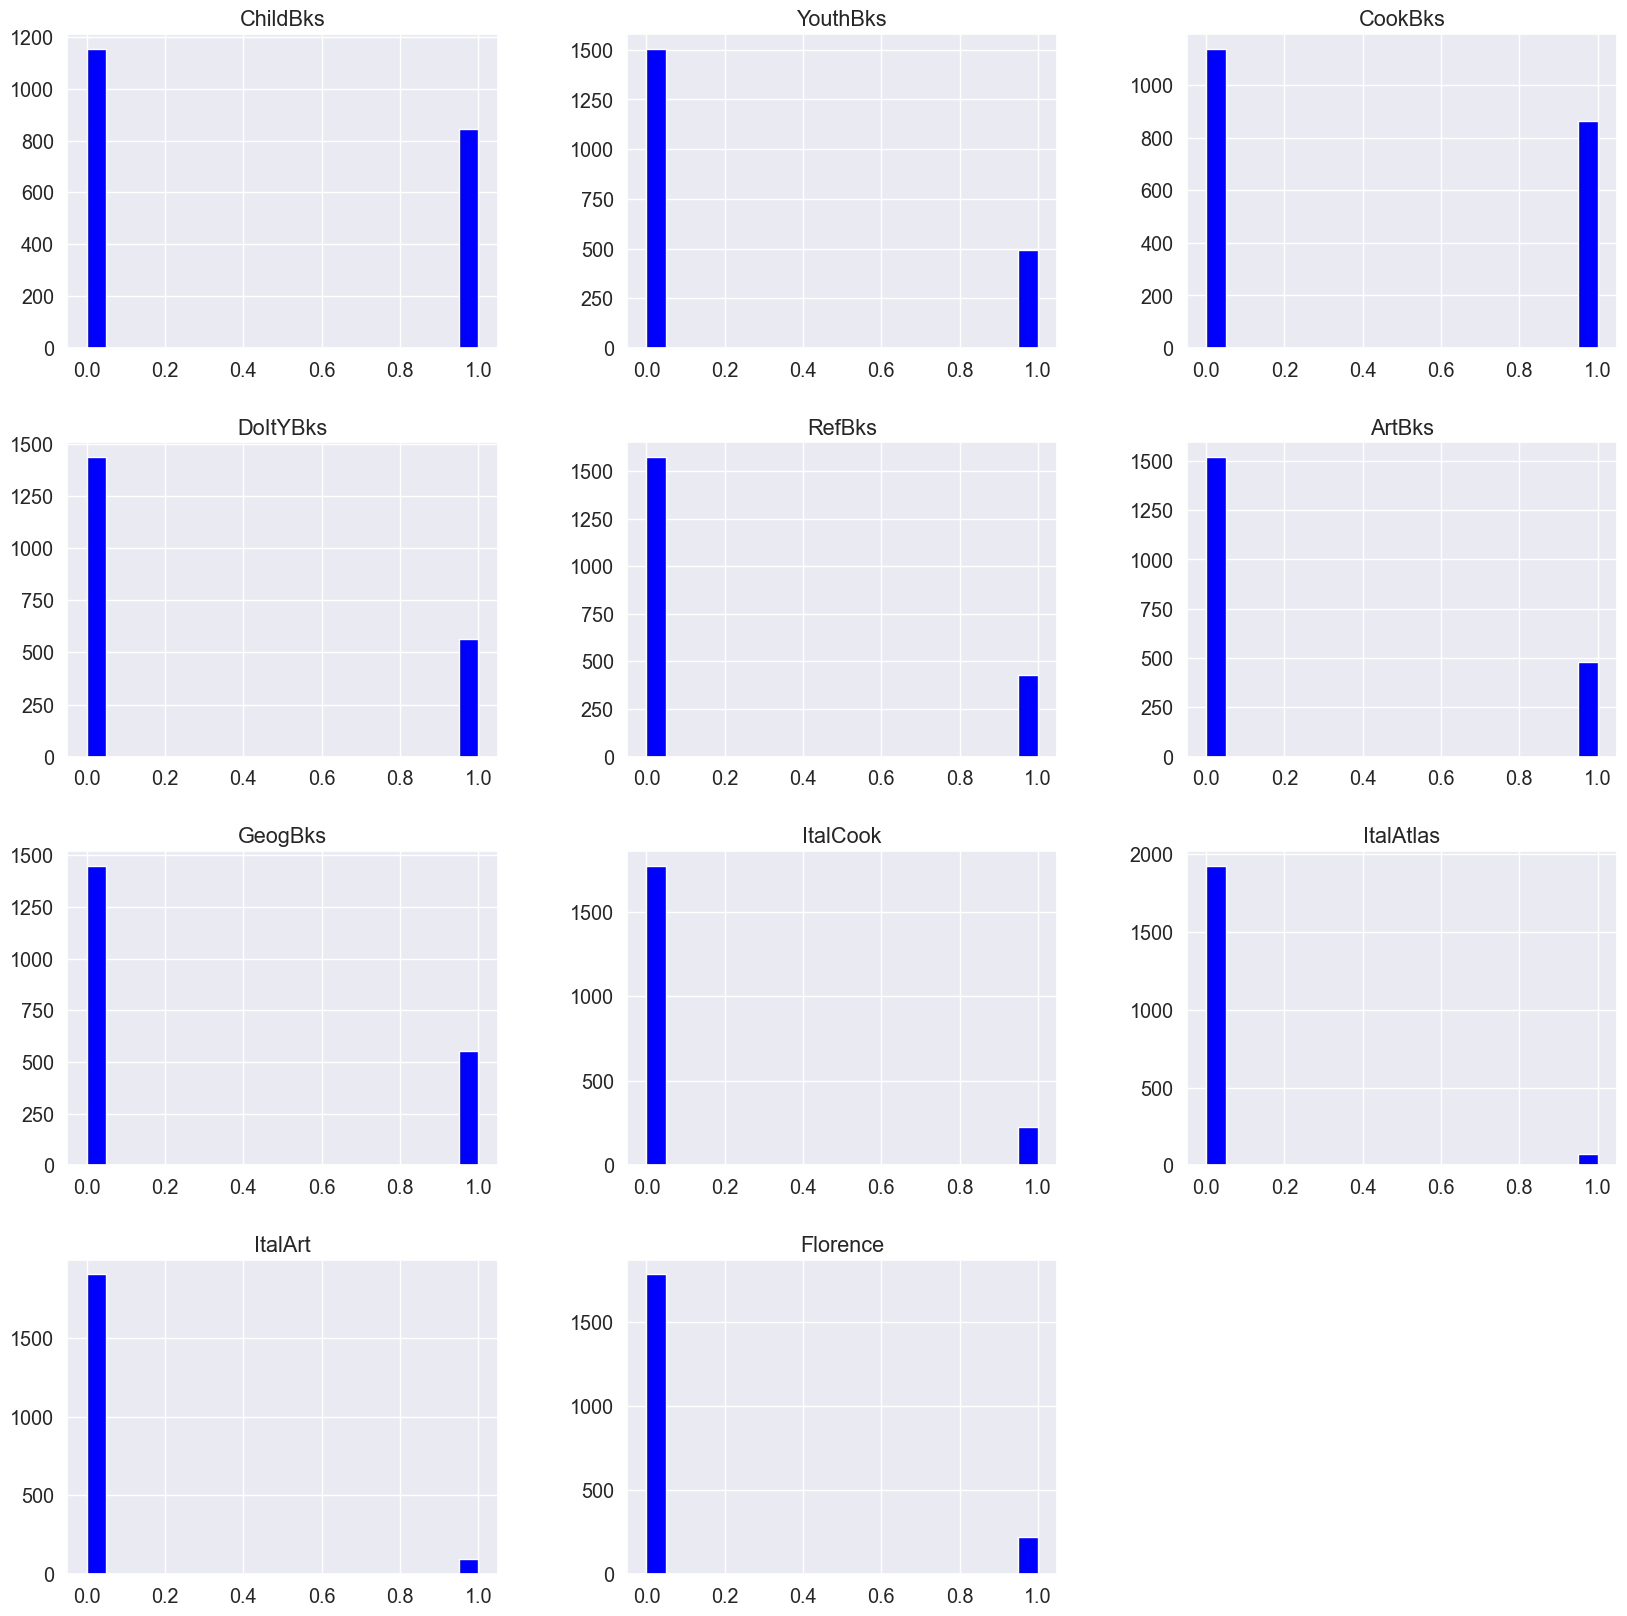

In [9]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=books.hist(bins=20,color='blue' )

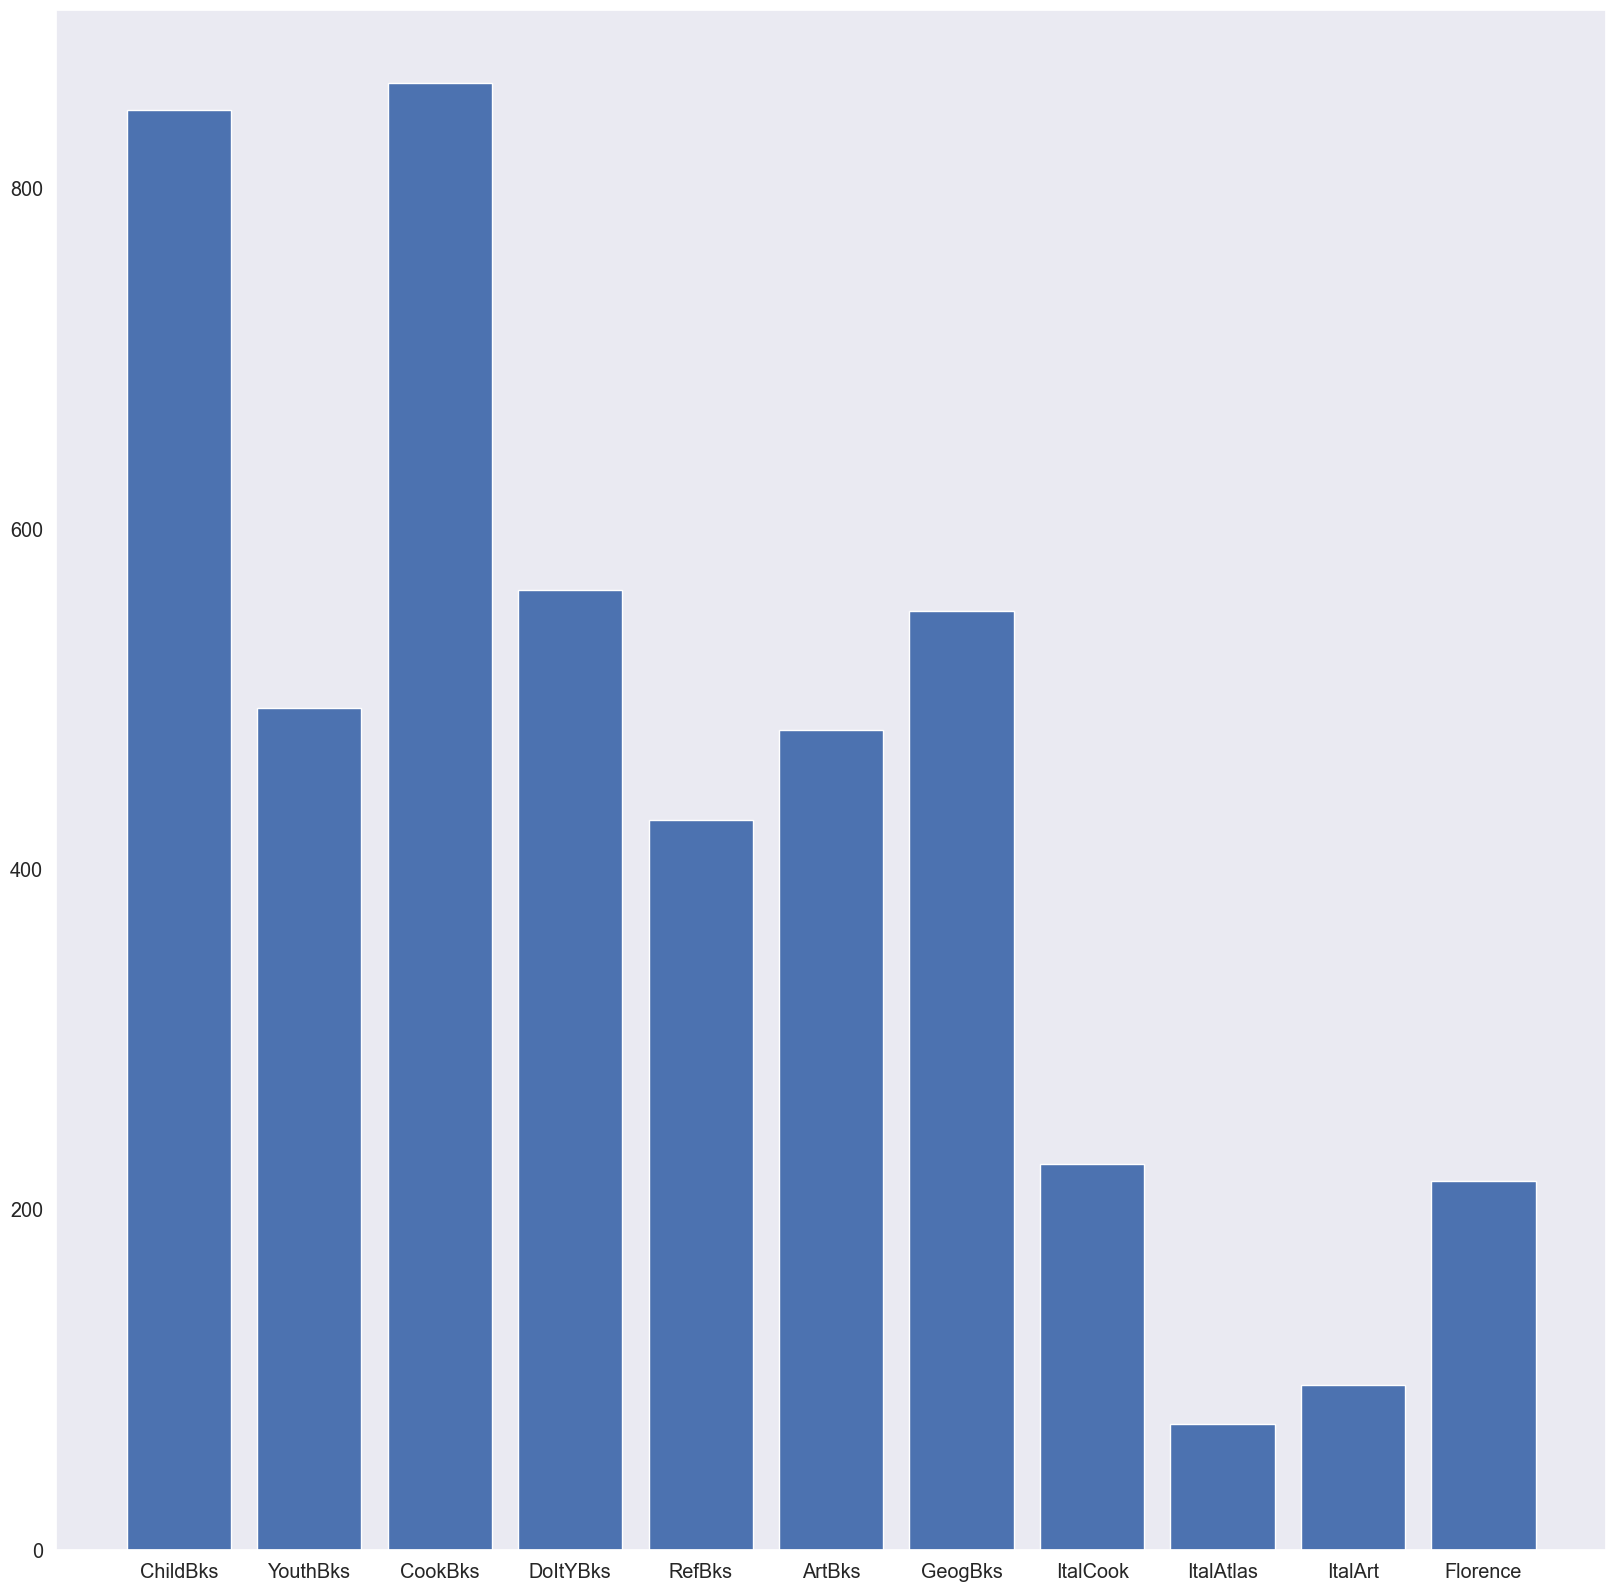

In [10]:
# ploting barplot for all columns in dataframe using for loop
book_count = []
col_names = books.columns

for name in col_names:
    book_count.append(books[name].value_counts()[1])
plt.bar(col_names, book_count)
plt.show();

- Count of cookbooks and child books are very high whereas italatlas books has lowest count

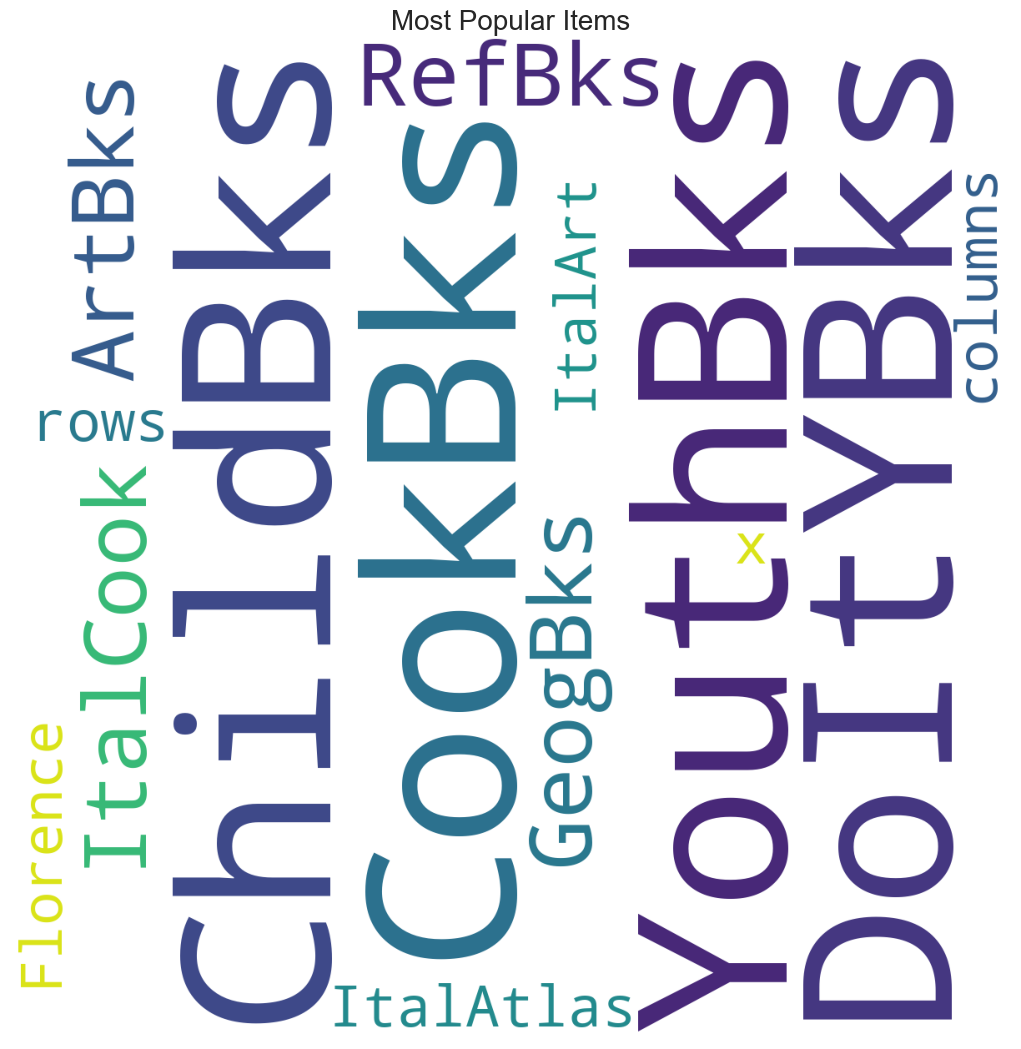

In [11]:
# Word cloud of most frequent books

from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (13, 13)

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(books))
plt.imshow(wordcloud)

plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show();


In [ ]:
# childbooks,cookbooks,youthbooks and doitbooks has highest frequncies

# Apriori Algorithm for min_support of 5%

In [12]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(books, min_support=0.05, use_colnames=True)
frequent_itemsets

C:\Users\PallaviJadhav\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, YouthBks, CookBks, DoItYBks)"
96,0.0560,"(GeogBks, YouthBks, CookBks, ArtBks)"
97,0.0650,"(GeogBks, CookBks, ArtBks, DoItYBks)"
98,0.0510,"(GeogBks, CookBks, YouthBks, DoItYBks, ChildBks)"


- their are 100 rows of columns combinations(ie one,two,three,four,five combinations) form for support with 5%

In [13]:
#Association Rule with minimum threshold level for 'lift' of 80%
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8) 
rules.sort_values('lift',ascending = False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(ChildBks, CookBks, ArtBks, DoItYBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(CookBks),"(GeogBks, ChildBks, ArtBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ArtBks),"(GeogBks, ChildBks, CookBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(DoItYBks),"(GeogBks, ChildBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


- Lift Ratio > 1 is a good influential rule in selecting the associated transactions

- with lift of 80% we got 662 association combinations of books

In [14]:
rule1=rules.iloc[:,:2]
rule1

,antecedents,consequents
0,(ChildBks),(YouthBks)
1,(YouthBks),(ChildBks)
2,(ChildBks),(CookBks)
3,(CookBks),(ChildBks)
4,(ChildBks),(DoItYBks)
...,...,...
657,(GeogBks),"(ChildBks, CookBks, ArtBks, DoItYBks)"
658,(CookBks),"(GeogBks, ChildBks, ArtBks, DoItYBks)"
659,(ArtBks),"(GeogBks, ChildBks, CookBks, DoItYBks)"
660,(DoItYBks),"(GeogBks, ChildBks, CookBks, ArtBks)"


In [15]:
# deleting duplicate rows
rule1.duplicated().sum()

0

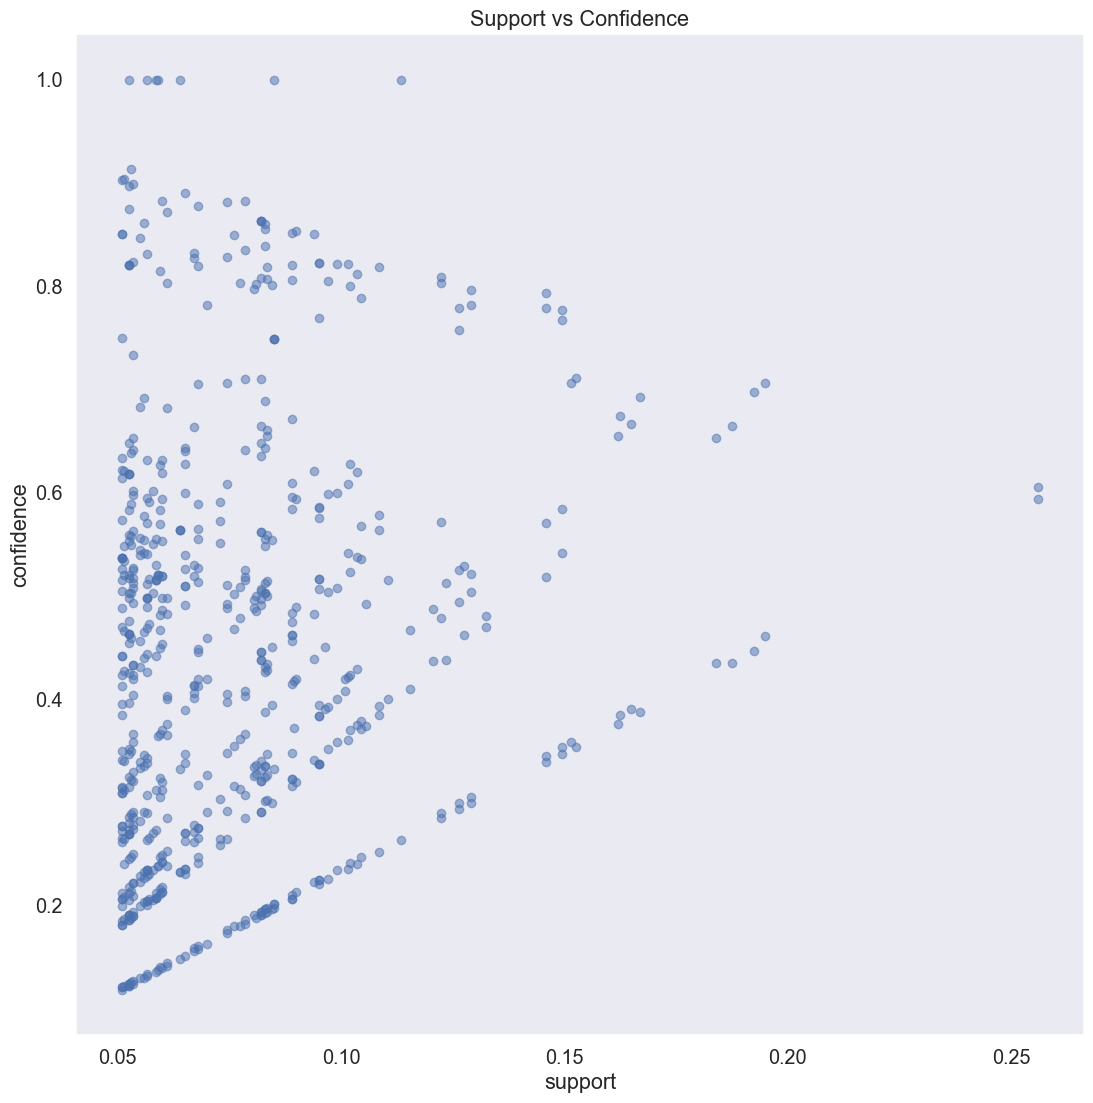

In [16]:
# visualization with support and confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show();

In [17]:
# Association Rule with minimum threshold level of 60% for confidence
rules_1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6) 
rules_1.sort_values('confidence',ascending = False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
130,"(GeogBks, ChildBks, CookBks, ArtBks)",(DoItYBks),0.0835,0.282,0.0535,0.640719,2.272052,0.029953,1.998433
131,"(GeogBks, ChildBks, CookBks, DoItYBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845
132,"(GeogBks, ChildBks, ArtBks, DoItYBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
133,"(ChildBks, CookBks, ArtBks, DoItYBks)",(GeogBks),0.0820,0.276,0.0535,0.652439,2.363910,0.030868,2.083088


In [18]:
# with support 5% and confidence 60% we get 135 books association

In [19]:
# confidence of 70%
rules_10 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7) 
rules_10.sort_values('confidence',ascending = False)
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(ChildBks, GeogBks, YouthBks, DoItYBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
83,"(GeogBks, YouthBks, DoItYBks)","(ChildBks, CookBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(GeogBks, CookBks, ArtBks, DoItYBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304
85,"(GeogBks, ChildBks, ArtBks, DoItYBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


In [20]:
#with 70% confidence we get 87 books association

# Apriori Algorithm for min_support = 0.1

In [21]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets_2 = apriori(books, min_support=0.1, use_colnames=True)
frequent_itemsets_2

C:\Users\PallaviJadhav\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [22]:
# Association Rule with minimum threshold level  for 'lift' of 80%
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=0.8) 
rules_2.sort_values('lift',ascending = False)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


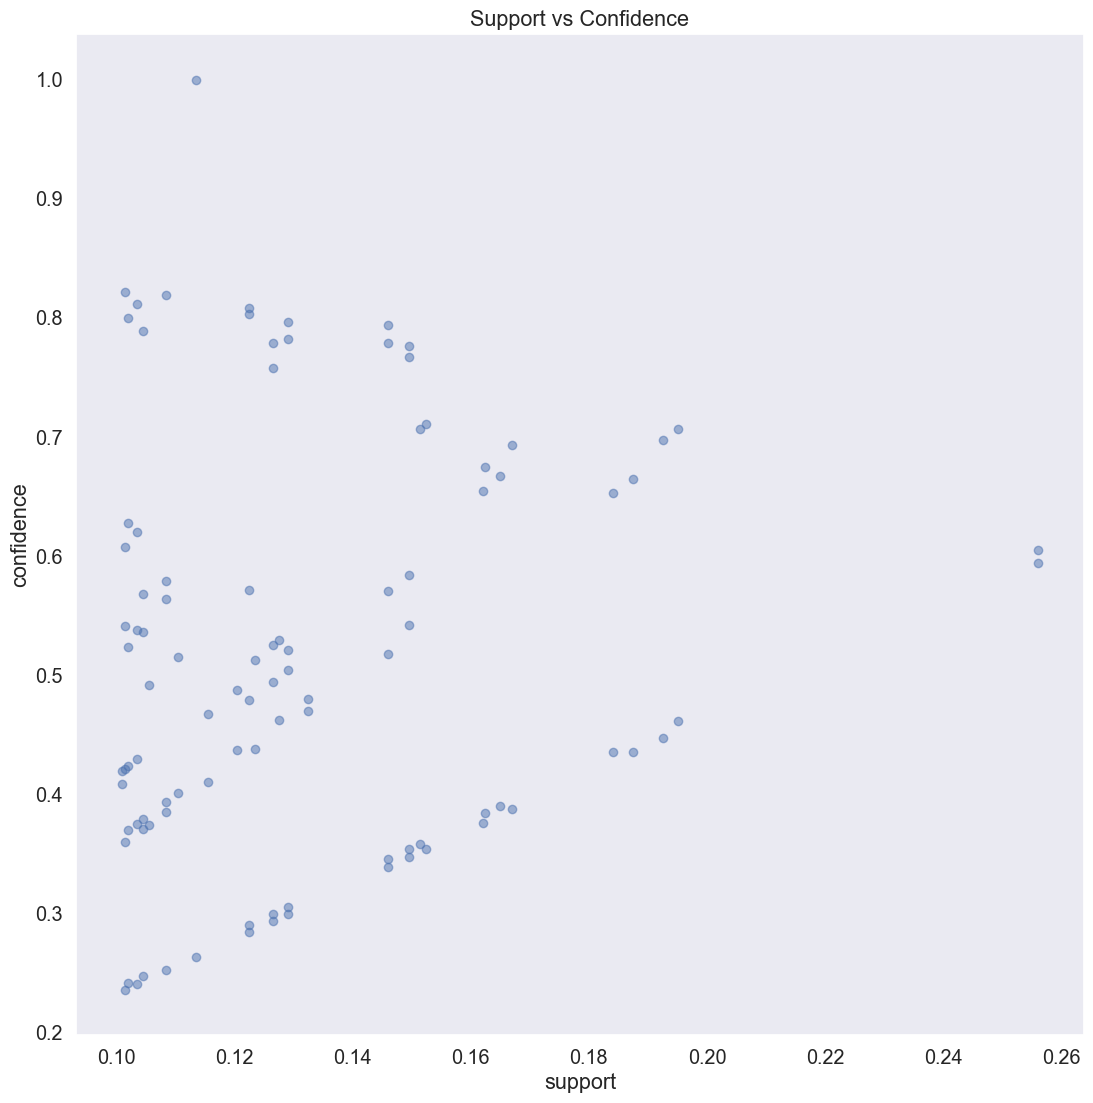

In [23]:
plt.scatter(rules_2['support'], rules_2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show();

In [24]:
# Association Rule with minimum threshold level of 60% for confidence
rules_3 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.6) 
rules_3.sort_values('confidence',ascending = False)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [25]:
# confidence of 70%
rules_30 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.7) 
rules_30.sort_values('confidence',ascending = False)
rules_30

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


# Apriori Algorithm for min_support = 0.2

In [26]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets_3 = apriori(books, min_support=0.2, use_colnames=True)
frequent_itemsets_3

C:\Users\PallaviJadhav\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [27]:
#  Association Rule with minimum threshold level for 'lift' of 80%
rules_3 = association_rules(frequent_itemsets_3, metric="lift", min_threshold=0.8) 
rules_3.sort_values('lift',ascending = False)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


- with support 20% and lift 80% the associated books are Cookbooks and Childbooks.
- from above book association, women with child should be target.
- so placing this two book far from each other and add beauty or women's interested product inbetween them gives best business strategy.

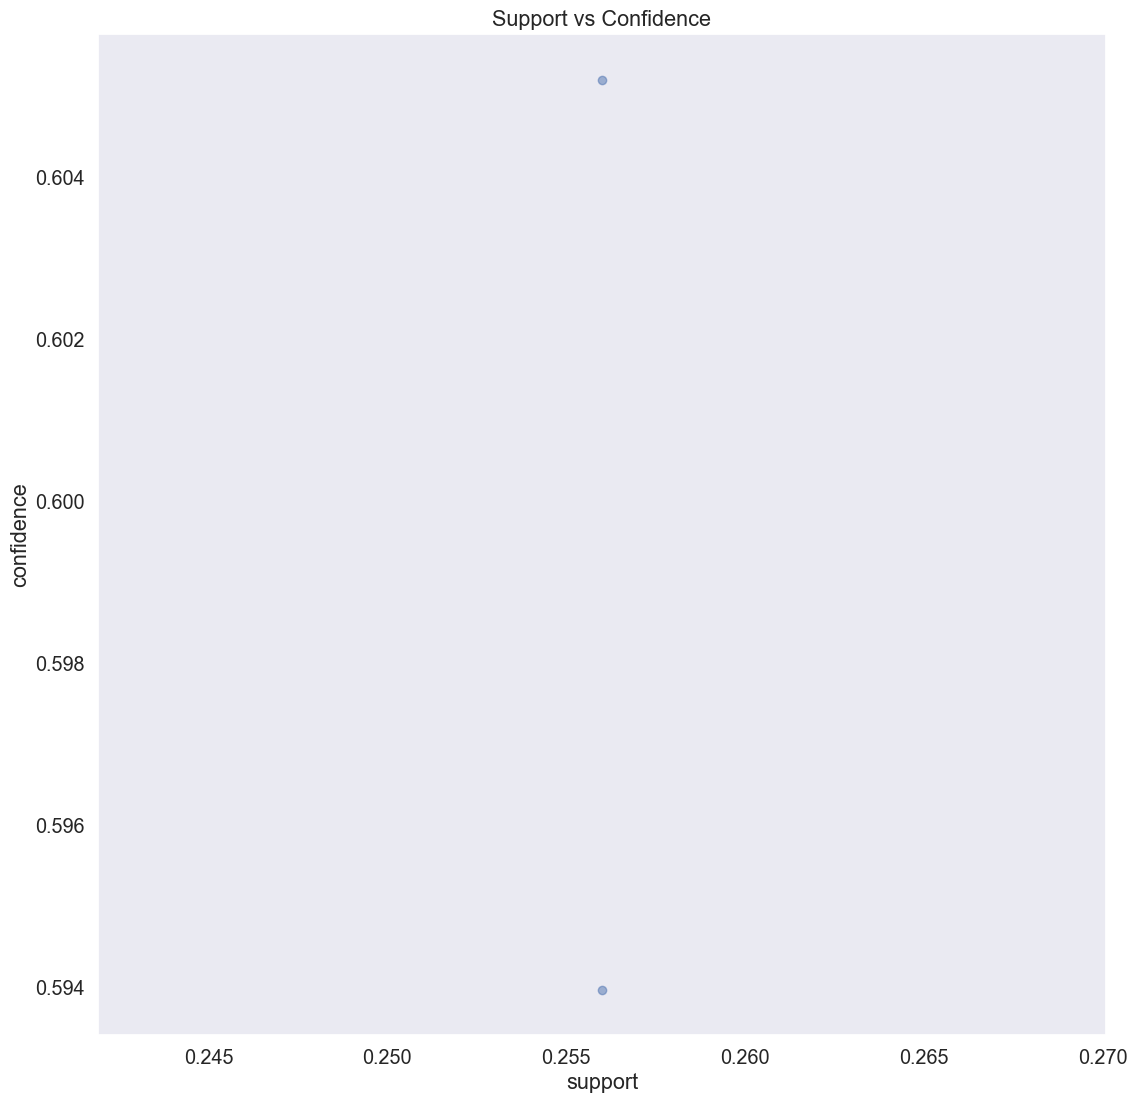

In [28]:
plt.scatter(rules_3['support'], rules_3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show();

In [29]:
# Association Rule with minimum threshold level of 60% for confidence
rules_4 = association_rules(frequent_itemsets_3, metric="confidence", min_threshold=0.6) 
rules_4.sort_values('confidence',ascending = False)
rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


In [30]:
# gives same association as lift

In [31]:
'''From Above 3 cases we observed that,
Lower the Confidence level Higher the no. of rules and vice-versa.
Higher the Support, lower the no. of rules. 
So, we can conclude that these  parameters different combinations can generate different rules.'''

'From Above 3 cases we observed that,\nLower the Confidence level Higher the no. of rules and vice-versa.\nHigher the Support, lower the no. of rules. \nSo, we can conclude that these  parameters different combinations can generate different rules.'